In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from 
%matplotlib inline

In [274]:
data = pd.read_csv('ESSdata_Thinkful.csv')

In [275]:
def replace_year(x):
    if x == 7:
        return 2014
    if x == 6:
        return 2012
    
data.year = data.year.map(lambda x: replace_year(x))

In [276]:
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [277]:
data.loc[(data.ppltrst[data.ppltrst.isna()].index),:]

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
1645,CZ,1101.0,2012,3.0,NaN,NaN,NaN,9.0,6.0,3.0,2.0,70.0,2.0
1809,CZ,1268.0,2012,7.0,NaN,4.0,2.0,7.0,2.0,2.0,2.0,68.0,1.0
1849,CZ,1308.0,2012,6.0,NaN,8.0,6.0,10.0,5.0,3.0,2.0,46.0,1.0
1857,CZ,1316.0,2012,1.0,NaN,NaN,4.0,8.0,2.0,1.0,2.0,29.0,1.0
1872,CZ,1331.0,2012,5.0,NaN,5.0,4.0,8.0,3.0,4.0,2.0,60.0,2.0
2149,CZ,2097.0,2012,6.0,NaN,NaN,NaN,5.0,1.0,3.0,1.0,16.0,2.0
2170,CZ,2118.0,2012,7.0,NaN,8.0,8.0,7.0,3.0,2.0,2.0,56.0,2.0
2513,CZ,1314.0,2014,0.0,NaN,3.0,2.0,0.0,7.0,3.0,1.0,45.0,1.0
4409,ES,814.0,2014,7.0,NaN,5.0,5.0,8.0,7.0,1.0,2.0,80.0,2.0
4891,ES,1921.0,2014,1.0,NaN,4.0,4.0,7.0,6.0,3.0,2.0,33.0,2.0


In [278]:
def get_averages(df):
    dic = {}
    cols = ['tvtot','ppltrst','pplfair','pplhlp','happy','sclmeet','sclact']
    for col in cols:
        ct_facts = []
        for cntry in set(data.cntry):
            ct_facts.append([cntry,data.loc[(data.cntry==cntry),[col]].mean()[0]])
        dic[col] = ct_facts
    return dic

In [279]:
avg_dic = get_averages(data)

In [280]:
#Function to fill in all the averages for a particular column
def fill_avgs(col,df):
    lit = avg_dic[col]
    for cnt in set(df.cntry):
        for item in lit:
            if item[0] == cnt:
                avg=item[1]
                break
        df.loc[(df.cntry==cnt),[col]] = \
        df.loc[(df.cntry==cnt),[col]].fillna(avg)

### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [283]:
fill_avgs('ppltrst',data)

In [182]:
data_trust = data.loc[:,['cntry','year','ppltrst']]

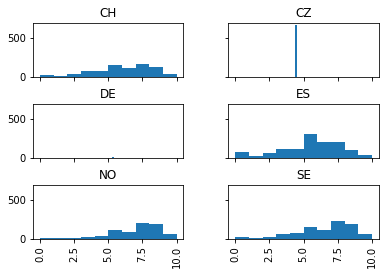

In [288]:
data_trust.loc[(data_trust.year==2012),['ppltrst','cntry']].hist(by=['cntry'],sharex=True, sharey=True)
plt.show()

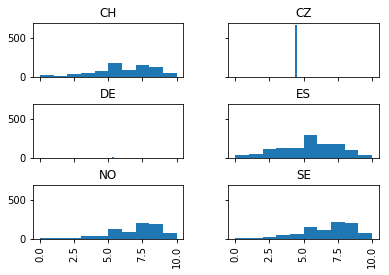

In [287]:
data_trust.loc[(data_trust.year==2014),['ppltrst','cntry']].hist(by=['cntry'],sharex=True, sharey=True)
plt.show()

In [164]:
#Data looks approximately normal

In [236]:
def get_cntry_changes(df):
    countries = set(df.cntry)
    for cntry in countries:
        c_trust = data_trust.loc[(data_trust.cntry == cntry),['ppltrst','year']]
        results = stats.ttest_rel(c_trust.loc[(c_trust.year==2012),['ppltrst']],\
                                  c_trust.loc[(c_trust.year==2014),['ppltrst']])
        
        print('Country: {}, Statistic: {}, P-value: {}'.format(cntry,results[0][0],\
                                                              results[1][0]))

In [237]:
get_cntry_changes(data_trust)

Country: ES, Statistic: 2.483799395392077, P-value: 0.0131332302479683
Country: CH, Statistic: -0.6586851756725737, P-value: 0.5102943511301135
Country: CZ, Statistic: nan, P-value: nan
Country: SE, Statistic: -2.073382457160033, P-value: 0.03841851160449428
Country: NO, Statistic: 0.5361777434115927, P-value: 0.5919990516862329
Country: DE, Statistic: nan, P-value: nan


In [238]:
#Run test on all countries combined
results = stats.ttest_rel(data_trust.loc[(data_trust.year==2012),['ppltrst']],\
                                  data_trust.loc[(data_trust.year==2014),['ppltrst']])
print(results)

Ttest_relResult(statistic=array([0.36919522]), pvalue=array([0.71200041]))


Overall there has been no change in people's trust, however looking at the breakdown between each country, It appears that people in ES and SE had a change in trust. Trust has decreased in ES and increased in SE.

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

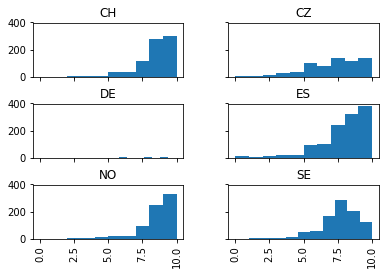

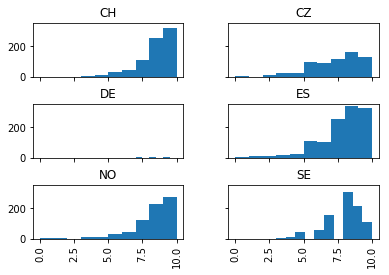

Country: ES, Statistic: 4.086118020109992, P-value: 0.043236838117116295
Country: CH, Statistic: 0.20163359105610804, P-value: 0.6534054769840507
Country: CZ, Statistic: 1.5716482642333078, P-value: 0.20996780717789276
Country: SE, Statistic: 0.038506386752578475, P-value: 0.8444298011877086
Country: NO, Statistic: 19.373390880485164, P-value: 1.0749444969735168e-05
Country: DE, Statistic: 0.39056749122656015, P-value: 0.532001255058662


In [295]:
#Replace nan values in dataset with averages
fill_avgs('happy',data)

#Get needed data
data_hap = data.loc[:,['cntry','year','happy']]

#Take a look at graphs of data
data_hap.loc[(data_trust.year==2012),['happy','cntry']].hist(by=['cntry'],sharex=True, sharey=True)
plt.show()
data_hap.loc[(data_trust.year==2014),['happy','cntry']].hist(by=['cntry'],sharex=True, sharey=True)
plt.show()

#Data is not normal, Need to use a non-parametric test
def get_hap_changes(df):
    countries = set(df.cntry)
    for cntry in countries:
        c_trust = df.loc[(df.cntry == cntry),['happy','year']]
        results = stats.kruskal(c_trust.loc[(c_trust.year==2012),['happy']],\
                                  c_trust.loc[(c_trust.year==2014),['happy']])
        
        print('Country: {}, Statistic: {}, P-value: {}'.format(cntry,results[0],\
                                                              results[1]))
get_hap_changes(data_hap)

In [296]:
print(data_hap.loc[(data_hap.cntry == 'ES')&(data_hap.year==2012),['happy']].mean(),
     data_hap.loc[(data_hap.cntry == 'ES')&(data_hap.year==2014),['happy']].mean())

happy    7.548627
dtype: float64 happy    7.42002
dtype: float64


There is no significant change in happiness from 2012 to 2014 with a 95% confidence level. The only country where there was a significant change was ES, in which happiness had declined.

### 3. Who reported watching more TV in 2012, men or women?

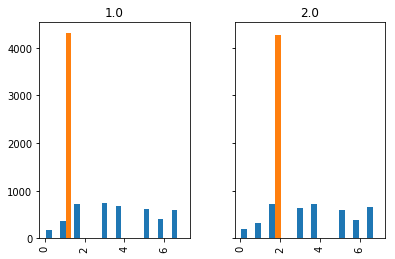

Male average: 3.83
Female average: 3.89
Overall: 
 Statistic: 2.498297632864963, P-value: 0.11396943370934245


In [313]:
#Fill in Nans with averages
fill_avgs('tvtot',data)

#Get the data we need
data_tv = data.loc[:,['tvtot','gndr']]

#Take a look at the data
data_tv.hist(by=['gndr'], sharex=True, sharey=True)
plt.show()

print('Male average: {0:.2f}'.format(data_tv.loc[(data_tv.gndr==1),['tvtot']].mean()[0]))
print('Female average: {0:.2f}'.format(data_tv.loc[(data_tv.gndr==2),['tvtot']].mean()[0]))

#Data does not look very normal. Let's run a non-parametric test.
results = stats.kruskal(data_tv.loc[(data_tv['gndr']==1),['tvtot']], data_tv.loc[(data_tv['gndr']==2),['tvtot']])
print('Overall: \n Statistic: {}, P-value: {}'.format(results[0],results[1]))

While at first glance at the means and graphs of the data, it would appear that women tend to report watching more TV than men, however, after running a kruskal statistic, it can be seen that there is no significant difference that can be reported. Neither women nor men report watching more TV at a statistically significant level.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

4297


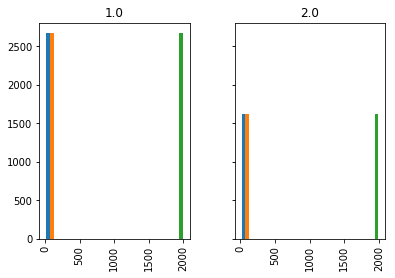

Spouse average: 6.08
Single average: 5.86
Overall: 
 Statistic: 13.781821273912154, P-value: 0.00020531329321977996


In [330]:
#Replace any nan values
fill_avgs('pplfair',data)

#Get needed data
data_fair =  data.loc[(data.year==2012),['pplfair','partner','year']]

#Take a look at the data
data_fair.hist(by=['partner'], sharex=True, sharey=True)
plt.show()

print('Spouse average: {0:.2f}'.format(data_fair.loc[(data_fair.partner==1),['pplfair']].mean()[0]))
print('Single average: {0:.2f}'.format(data_fair.loc[(data_fair.partner==2),['pplfair']].mean()[0]))

#Graphs are not normal at all. Let's run a non-parametric test
results = stats.kruskal(data_fair.loc[(data_fair['partner']==1),['pplfair']], 
                        data_fair.loc[(data_fair['partner']==2),['pplfair']])
print('Overall: \n Statistic: {}, P-value: {}'.format(results[0],results[1]))

We can predict that people living with a partner are more likely to believe that people are fair in 2012 at a 99% confidence level.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

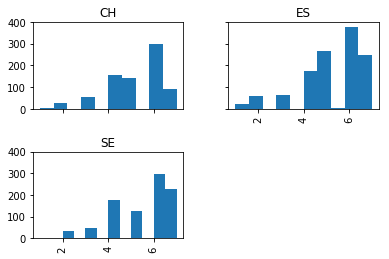

Overall: 
 Statistic: 20.99636826147012, P-value: 2.758649736836403e-05


In [339]:
#Fill nans in
fill_avgs('sclmeet',data)

#Pick three countries
cntries = ['CH','ES','SE']

#Get the data we need
data_meet = data.loc[(data.year==2014)&((data.cntry=='CH')|(data.cntry=='ES')|
                                        (data.cntry=='SE')),['sclmeet','cntry']]

#Take a look at the data
data_meet.hist(by=['cntry'], sharex=True, sharey=True)
plt.show()

#Data is not normal. Let's run non-parametric tests.
final = stats.kruskal(data_meet.loc[(data_meet.cntry=='CH'),['sclmeet']],
             data_meet.loc[(data_meet.cntry=='ES'),['sclmeet']],
             data_meet.loc[(data_meet.cntry=='SE'),['sclmeet']])
print('Overall: \n Statistic: {}, P-value: {}'.format(final[0],final[1]))

In [359]:
#There is definitely a significant difference here, let's take a deeper look:

print(stats.ttest_ind(data_meet.loc[(data_meet.cntry=='CH'),['sclmeet']],
                      data_meet.loc[(data_meet.cntry=='ES'),['sclmeet']]))
print(stats.ttest_ind(data_meet.loc[(data_meet.cntry=='CH'),['sclmeet']],
                      data_meet.loc[(data_meet.cntry=='SE'),['sclmeet']]))
print(stats.ttest_ind(data_meet.loc[(data_meet.cntry=='ES'),['sclmeet']],
                      data_meet.loc[(data_meet.cntry=='SE'),['sclmeet']]))

print(data_meet.loc[(data_meet.cntry=='SE'),['sclmeet']].mean()[0],
      data_meet.loc[(data_meet.cntry=='ES'),['sclmeet']].mean()[0],
      data_meet.loc[(data_meet.cntry=='CH'),['sclmeet']].mean()[0])


Ttest_indResult(statistic=array([-1.53699285]), pvalue=array([0.12445452]))
Ttest_indResult(statistic=array([-4.04053236]), pvalue=array([5.57384261e-05]))
Ttest_indResult(statistic=array([-2.6521483]), pvalue=array([0.00805779]))
5.426211453744493 5.26008973799528 5.160570016258853


When comparing how often people meet socially between Switzerland, Spain, and Sweden we can see that the groups have a significant difference betwen all of them. When breaking down the individual comparison, it appears that Sweden stands out between both other groups. Sweden meets people socially more often than Switzerland or Spain.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

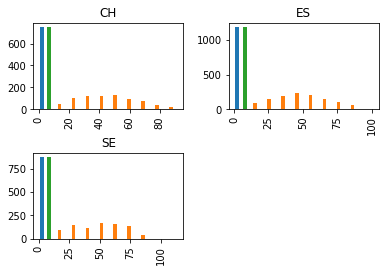

Overall: 
 Statistic: 45.1317550145986, P-value: 1.5840318850511988e-10


In [376]:
#Fill nans in
fill_avgs('sclact',data)

#Pick three countries
cntries = ['CH','ES','SE']

#Get the data we need
data_social = data.loc[(data.year==2014)&((data.cntry=='CH')|(data.cntry=='ES')|
                                        (data.cntry=='SE')),['sclact','cntry','agea']]
data_social['act_by_age'] = data_social.sclact/data_social.agea

#Take a look at the data
data_social.hist(by=['cntry'], column=['act_by_age'])
plt.show()

#Distribution of graph is about normal with a large skew to the left. Let's run non-parametric tests.
finals = stats.kruskal(data_social.loc[(data_social.cntry=='CH'),['sclact']],
             data_social.loc[(data_social.cntry=='ES'),['sclact']],
             data_social.loc[(data_social.cntry=='SE'),['sclact']])
print('Overall: \n Statistic: {}, P-value: {}'.format(finals[0],finals[1]))

In [380]:
#There is definitely a significant change here. Let's dive in.

print(stats.ttest_ind(data_social.loc[(data_social.cntry=='CH'),['sclact']],
                      data_social.loc[(data_social.cntry=='ES'),['sclact']]))
print(stats.ttest_ind(data_social.loc[(data_social.cntry=='CH'),['sclact']],
                      data_social.loc[(data_social.cntry=='SE'),['sclact']]))
print(stats.ttest_ind(data_social.loc[(data_social.cntry=='ES'),['sclact']],
                      data_social.loc[(data_social.cntry=='SE'),['sclact']]))

print('Sweden:',data_social.loc[(data_social.cntry=='SE'),['sclact']].mean()[0],
      '\n Spain:',data_social.loc[(data_social.cntry=='ES'),['sclact']].mean()[0],
      '\n Switzerland:',data_social.loc[(data_social.cntry=='CH'),['sclact']].mean()[0])



Ttest_indResult(statistic=array([3.8607289]), pvalue=array([0.00011667]))
Ttest_indResult(statistic=array([-2.27498996]), pvalue=array([0.02303213]))
Ttest_indResult(statistic=array([-6.60979735]), pvalue=array([4.85460132e-11]))
Sweden: 2.8795095643010815 
 Spain: 2.616219321393999 
 Switzerland: 2.781301811040766


All three countries differ by the ratio of social activities to age at a significance level of 97-99% overall and individually. Spain sticks out as the most significantly different from both Sweden and Switzerland.